In [1]:
from img_doc.document import Document, Page
import matplotlib.pyplot as plt

2024-02-29 13:33:47.501467: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 13:33:47.537900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 13:33:47.537932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 13:33:47.539062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 13:33:47.544753: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 13:33:47.545176: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
page = Page()
page.set_from_path("img/10.png")
# doc = Document()
# doc.set_from_path("pdf/example_with_table9.pdf")
# page = doc.pages[0]

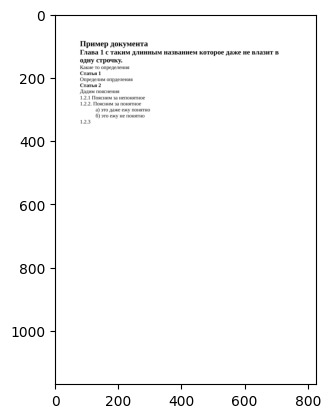

In [3]:
page.image.plot()

In [4]:
page.extract_word()

In [5]:
page.extract_word_bold()

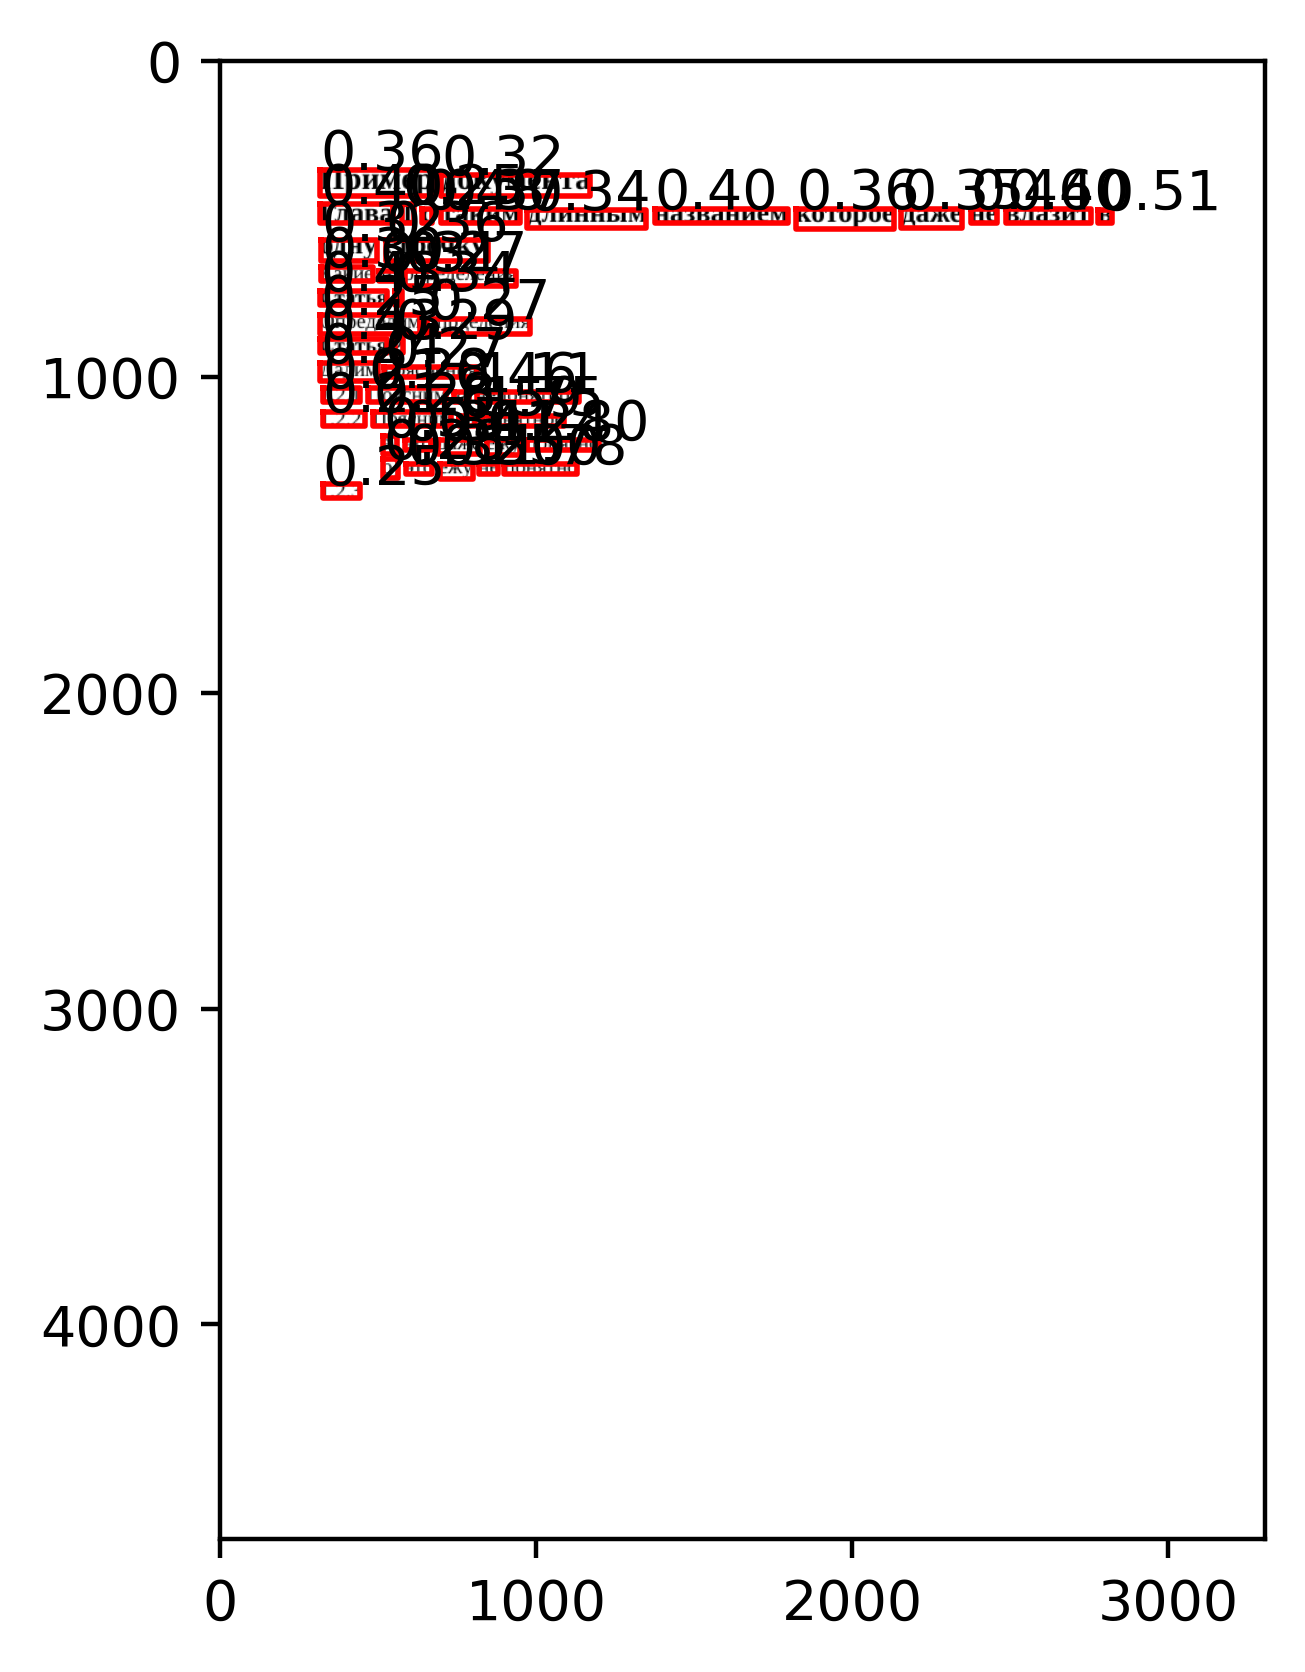

In [10]:
plt.figure(dpi=400)
page.image.plot()
for word in page.words:
    # if word.bold >= 0.35:
        word.segment.plot(color="r", text=f"{word.bold:.2f}")

# plt.ylim([400, 50])
# plt.xlim([50, 300])

In [8]:
import numpy as np
MIN_H = 5
def get_h_word_img( img_word: np.ndarray) -> float:
    h, w = img_word.shape[:2]
    mean_ = img_word.mean(1)
    a1 = mean_.min()
    a2 = mean_.max()
    mean_len = len(mean_)
    c_min = np.inf
    h_min = 0
    h_max = len(mean_)-1
    for b1 in range(mean_len//2):
        for b2 in range(mean_len//2, mean_len):
            c1 = ((mean_[:b1] - a2)**2).sum()
            c2 = ((mean_[b1:b2] - a1)**2).sum()
            c3 = ((mean_[b2:] - a2)**2).sum()
            c = c1+c2+c3
            if c_min > c:
                c_min = c
                h_min = b1
                h_max = b2

    return mean_, a1, a2, h_min, h_max


def _get_h_word_img(img_word: np.ndarray) -> float:
        h, w = img_word.shape
        if h < MIN_H:
            return h
        
        mean_ = img_word.mean(1)
        if 2*w < h:
            not_space = mean_ < 0.95
            return len(not_space)

        a1 = mean_.min()
        a2 = mean_.max()
        mean_len = len(mean_)
        c_min = np.inf
        h_min = 0
        h_max = len(mean_)-1
        for b1 in range(mean_len//2):
            for b2 in range(mean_len//2, mean_len):
                c1 = ((mean_[:b1] - a2)**2).sum()
                c2 = ((mean_[b1:b2] - a1)**2).sum()
                c3 = ((mean_[b2:] - a2)**2).sum()
                c = c1+c2+c3
                if c_min > c:
                    c_min = c
                    h_min = b1
                    h_max = b2

        if h_max-h_min < MIN_H:
            return h

        return h_max-h_min

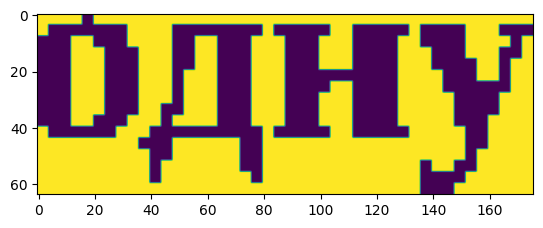

In [9]:
word1  = page.words[15]
word2 = page.words[13]
word = word2
img_word = word.segment.get_segment_from_img(page.image.get_binary_image())
plt.imshow(img_word)

In [10]:
def _get_s_word_img(img_word: np.ndarray) -> float:
    img_word_inv = 1-img_word
    return img_word_inv.sum()
    
def _get_p_word_img(img_word: np.ndarray) -> float:
    img1 = img_word + 1
    img_p = img1[:, 1:] -img_word[:, :-1]
    # img_p[img_p == 0] = 2
    img_p[img_p == 1] = 0
    img_p[img_p == 2] = 1
    return img_p.sum()
p = _get_p_word_img(img_word)
s = _get_s_word_img(img_word)
h = _get_h_word_img(img_word)
print(p, s, h, s/p/h)

71 163 7 0.32796780684104626


8


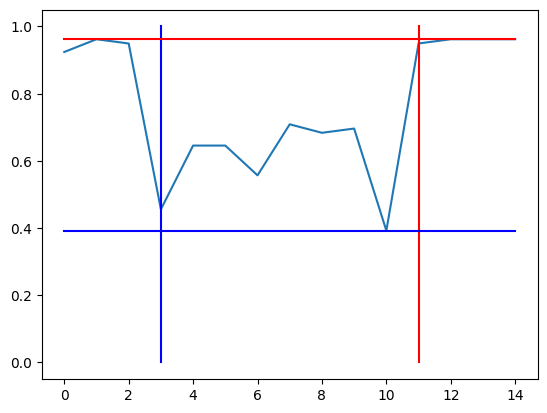

In [12]:
mean_, a1, a2, h_min, h_max = get_h_word_img(img_word)
plt.plot(mean_)
plt.plot([h_min, h_min], [0, 1], "b")
plt.plot([h_max, h_max], [0, 1], "r")
plt.plot([0, len(mean_)-1], [a1, a1], "b")
plt.plot([0, len(mean_)-1], [a2, a2],"r")
print( h_max-h_min)

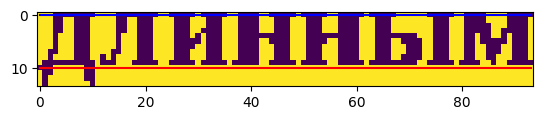

In [46]:
plt.imshow(img_word)
plt.plot([0, img_word.shape[1]-1], [h_min, h_min], "b")
plt.plot([0, img_word.shape[1]-1],[h_max, h_max], "r")

In [58]:
from img_doc.document.page.word.word_bold_extractor import PsBoldExtractor
from img_doc.image.editors import ValleyEmphasisBinarizer


In [59]:
ps_ext = PsBoldExtractor()
binarizer = ValleyEmphasisBinarizer()

In [60]:
ocen = []
gray_image = binarizer.binarize(page.image.img)
for word in page.words:
    if word.segment.get_height() > 5:
        ocen.append(ps_ext.evaluation_words(word.segment.get_segment_from_img(gray_image, delta=2)))

In [61]:
def is_alph(text_):
    if text_ in ["", "—", "_", ",", "-", "|", " ", "‚"]:
        return False
    print(text_)
    return True
ps_ext.extract([word for word in page.words if is_alph(word.text)] , gray_image)

Пример
документа
Глава
1
с
таким
длинным
названием
которое
даже
не
влазит
в
одну
строчку.
Какие
то
определения
Статья
1
Определим
опрделения
Статья
2
Дадим
пояснения
1.2.1
Поясним
за
непонятное
1.2.2.
Поясним
за
понятное
а)
это
даже
ежу
понятно
6)
это
ежу
не
понятно
123


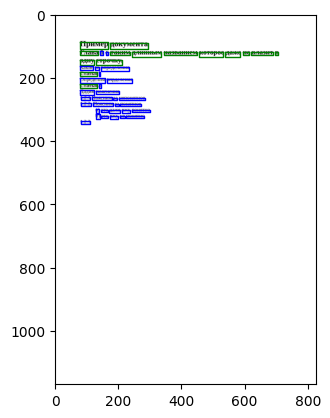

In [62]:
page.image.plot()
for word in page.words:
    if word.bold == 1:
        word.segment.plot(color="b")
    elif word.bold == 0:
         word.segment.plot(color="g")

In [63]:
import numpy as np

In [64]:
rez = []
array_k = np.linspace(2, 0.5, 20)
page.set_from_path("img/10.png")
page.extract_word()
N = len(page.words)
M = len(array_k)
rez = np.zeros((N, M))
for j, k in enumerate(array_k):
    page.set_from_path("img/10.png")
    page.extract_word()
    page.resize(k)
    
    gray_image = binarizer.binarize(page.image.img)
    for i, word in enumerate(page.words):
        rez[i][j] = ps_ext.evaluation_words(word.segment.get_segment_from_img(gray_image))

In [65]:
import matplotlib.pyplot as plt

(2.0, 0.5)

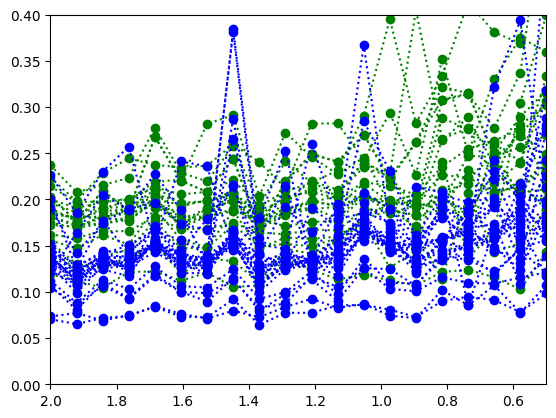

In [75]:
for i in range( N):
    if i >15 and not (i in [18, 19]) and not (i in [22, 23]): 
        plt.plot(array_k, rez[i,:], 'b:o')
    else:
        plt.plot(array_k, rez[i,:], 'g:o')
plt.ylim([0, 0.4])
plt.xlim([2, 0.5])

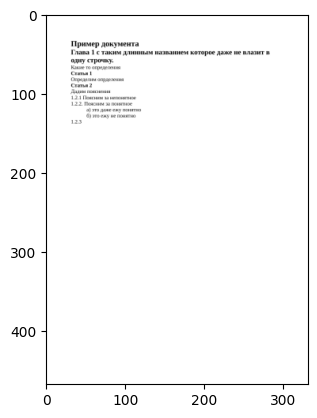

In [56]:
page.set_from_path("img/10.png")
page.extract_word()
page.resize(0.4)
page.image.plot()

In [160]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont


path_ttf = r"../src/img_doc/document/page/word/word_bold_extractor/cluster_word_bold_extractor/text_ps_bold_extractor/"
path_ttf_regular = os.path.join(path_ttf, "reg.ttf")
path_ttf_bold = os.path.join(path_ttf, "bold.ttf")

json_width  = dict()
x = [8, 9, 10, 11, 12, 13, 14, 15]
alphabet = "АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюя"+\
           "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"+\
           "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"

for i in range(len(alphabet)):
    char_ = alphabet[i] 
    json_width[char_] = []
    for size in x:
        reg = ImageFont.truetype(path_ttf_regular, size=size)
        bold = ImageFont.truetype(path_ttf_bold, size=size)
        width = size
        height = size
        
        img_r = Image.new('RGB', (width, height), color=(255, 255, 255))
        imgDraw = ImageDraw.Draw(img_r)
        imgDraw.text((round(size/8), -round(size/8)), char_, font=reg, fill=(0, 0, 0))
        
        img_b = Image.new('RGB', (width, height), color=(255, 255, 255))
        imgDraw = ImageDraw.Draw(img_b)
        imgDraw.text((10, -10), char_, font=bold, fill=(0, 0, 0))

        img_r = np.array(img_r.convert('L'))
        img_b = np.array(img_b.convert('L'))
        
        img_r[img_r < 128 ] = 0
        img_r[img_r >=128 ] = 1

        
        img_b[img_b < 128 ] = 0
        img_b[img_b >=128 ] = 1

        img_b.dtype = "bool"
        img_r.dtype = "bool"
        ar = (1-np.array(img_r))
        ab = (1-np.array(img_b))
        # bs = ar.sum()/ab.sum()
        pr = ar[:-1,:-1]-ar[1:,1:]
        pb = ab[:-1,:-1]-ab[1:,1:]
        pr[pr < 0] = 1
        pb[pb < 0] = 1
        # bp = pb.sum()/pr.sum()
    
        json_width[char_].append({"ar": ar.sum(), "ab": ab.sum(), "pr": pr.sum(), "pb": pb.sum()})

In [178]:
alp = "A"
def plot(alphs):
    c = len(alphs)
    fig, axes = plt.subplots(nrows=c, ncols=3, figsize=(8, 8*c//3))
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    for i, alp in enumerate(alphs):
        y11 = [j["ar"] for j in json_width[alp]]
        y12 = [j["ab"] for j in json_width[alp]]
        plt.subplot(c, 3, i*3+1)
        plt.plot(x, y11)
        plt.plot(x, y12)
        plt.ylim([0,100])
        plt.legend(["reg", "bold"])
        plt.title(f"Площадь буквы {alp}")
        
        y21 = [j["pr"] for j in json_width[alp]]
        y22 = [j["pb"] for j in json_width[alp]]
        plt.subplot(c, 3, i*3+2)
        plt.plot(x, y21)
        plt.plot(x, y22)
        plt.ylim([0, 100])
        plt.legend(["reg", "bold"])
        plt.title(f"Периметр буквы {alp}")
        
        y31 = [j["ar"]/j["pr"]/x[i] if j["pr"] != 0 else 1 for i,j in enumerate(json_width[alp])]
        y32 = [j["ab"]/j["pb"]/x[i] if j["pb"] != 0 else 1 for i,j in enumerate(json_width[alp])]
        plt.subplot(c, 3, i*3+3)
        plt.plot(x, y31)
        plt.plot(x, y32)
        plt.ylim([0, 0.2])
        plt.legend(["reg", "bold"])
        plt.title(f"norm width {alp}")


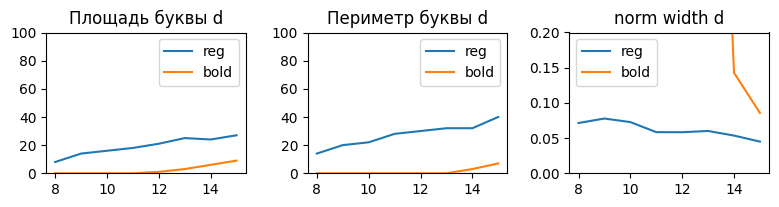

In [180]:
plot(["d"])

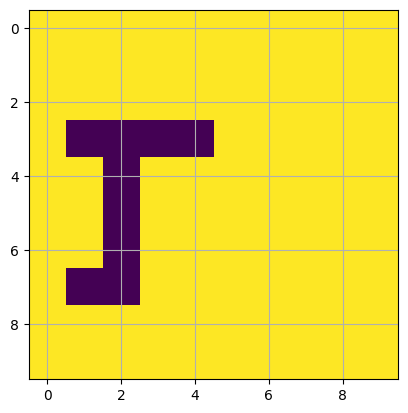

In [165]:

char_ = "г"
size = 10
reg = ImageFont.truetype(path_ttf_regular, size=size)
bold = ImageFont.truetype(path_ttf_bold, size=size)
width = size
height = size

img_r = Image.new('RGB', (width, height), color=(255, 255, 255))
imgDraw = ImageDraw.Draw(img_r)
imgDraw.text((round(size/8), -round(size/8)), char_, font=reg, fill=(0, 0, 0))

img_b = Image.new('RGB', (width, height), color=(255, 255, 255))
imgDraw = ImageDraw.Draw(img_b)
imgDraw.text((10, -10), char_, font=bold, fill=(0, 0, 0))

img_r = np.array(img_r.convert('L'))
img_b = np.array(img_b.convert('L'))

img_r[img_r < 128 ] = 0
img_r[img_r >=128 ] = 1


img_b[img_b < 128 ] = 0
img_b[img_b >=128 ] = 1

img_b.dtype = "bool"
img_r.dtype = "bool"

plt.imshow(img_r)
# plt.xlim([15, 50])
# plt.ylim([80, 60])
plt.grid()
# plt.xticks([i for i in range(15, 50)])

In [10]:
PERMISSIBLE_H_BBOX = 2
def get_height(image):
    
    h = image.shape[0]
    if h < PERMISSIBLE_H_BBOX:
        return h
    mean_ = image.mean(1)
    delta_mean = abs(mean_[:-1] - mean_[1:])

    max1 = 0
    max2 = 0
    argmax1 = 0
    argmax2 = 0
    for i, delta_mean_i in enumerate(delta_mean):
        if delta_mean_i <= max2:
            continue
        if delta_mean_i > max1:
            max2 = max1
            argmax2 = argmax1
            max1 = delta_mean_i
            argmax1 = i
        else:
            max2 = delta_mean_i
            argmax2 = i
    h_min = min(argmax1, argmax2)
    h_max = min(max(argmax1, argmax2) + 1, h)
    if h_max-h_min < PERMISSIBLE_H_BBOX:
        return h
    return h_max-h_min
page.set_from_path("img/10.png")
page.extract_word()

gray_image = binarizer.binarize(page.image.img)    

a = [ps_ext._get_base_line_image(word.segment.get_segment_from_img(gray_image)).shape[0] for word in page.words]

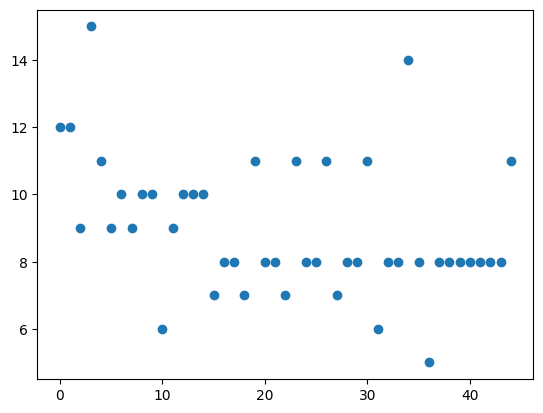

In [11]:
plt.plot(a, "o")

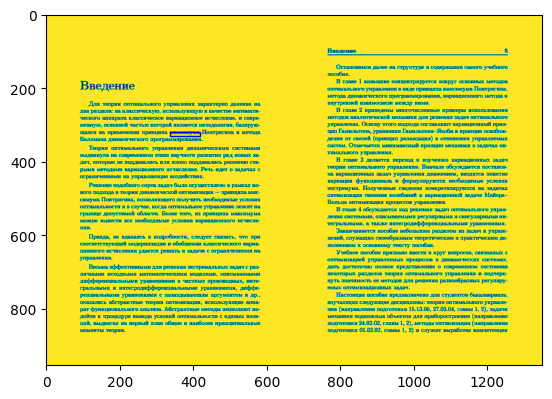

In [50]:
plt.imshow(gray_image)
page.words[90].segment.plot()
# plt.ylim([150, 60])

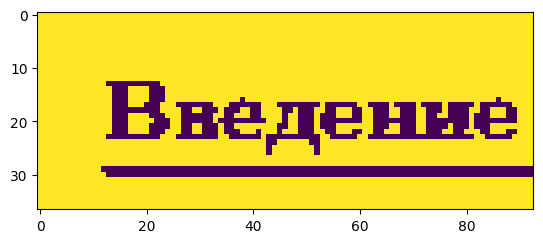

In [39]:
im = page.words[0].segment.get_segment_from_img(gray_image, delta=3)
plt.imshow(im)

In [20]:
ps_ext.evaluation_words(im)

0.10992592592592591

In [27]:
0.0785185185185185

0.0785185185185185

In [215]:
0.18536931818181818
0.1605619827731802
0.16868668149246355
0.15863095238095234

In [21]:
ps_ext._get_base_line_image(im).shape[0]

15

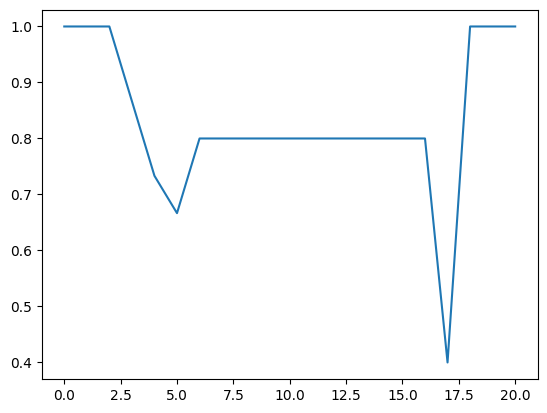

In [37]:
mean_ = im.mean(1)
plt.plot(mean_)

In [43]:
a1 = mean_.min()
a2 = mean_.max()
mean_len = len(mean_)
c_min = mean_len
h_min = 0
h_max = len(mean_)-1
for b1 in range(mean_len//2):
    for b2 in range(mean_len//2, mean_len):
        c1 = ((mean_[:b1] - a2)**2).sum()
        c2 = ((mean_[b1:b2] - a1)**2).sum()
        c3 = ((mean_[b2:] - a2)**2).sum()
        
        c = c1+c2+c3
        print(b1, b2, c)
        if c_min > c:
            print("new")
            c_min = c
            h_min = b1
            h_max = b2

0 10 2.76
new
0 11 2.88
0 12 3.0
0 13 3.1200000000000006
0 14 3.2400000000000007
0 15 3.3600000000000008
0 16 3.48
0 17 3.6
0 18 3.24
0 19 3.6
0 20 3.96
1 10 2.3999999999999995
new
1 11 2.5199999999999996
1 12 2.6399999999999997
1 13 2.7600000000000002
1 14 2.8800000000000003
1 15 3.0000000000000004
1 16 3.1200000000000006
1 17 3.2399999999999998
1 18 2.88
1 19 3.2399999999999998
1 20 3.5999999999999996
2 10 2.04
new
2 11 2.16
2 12 2.2800000000000002
2 13 2.4000000000000004
2 14 2.5200000000000005
2 15 2.6400000000000006
2 16 2.7600000000000007
2 17 2.880000000000001
2 18 2.52
2 19 2.88
2 20 3.2399999999999998
3 10 1.68
new
3 11 1.8
3 12 1.9200000000000002
3 13 2.0400000000000005
3 14 2.1600000000000006
3 15 2.2800000000000007
3 16 2.400000000000001
3 17 2.520000000000001
3 18 2.160000000000001
3 19 2.5200000000000005
3 20 2.8800000000000003
4 10 1.48
new
4 11 1.5999999999999999
4 12 1.7199999999999998
4 13 1.8399999999999999
4 14 1.9600000000000002
4 15 2.08
4 16 2.2000000000000006
4 

In [39]:
a1, a2

(0.4, 1.0)